# Assignment 2 _Q1


1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one 
for the background). Add Gaussian noise to the image. Implement and test Otsu’s 
algorithm with this image.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

In [152]:

# Set a random seed for reproducibility
np.random.seed(123)
# Load the original image
original_image = plt.imread('original_image.png')

# Add Gaussian noise to the image
noise = np.random.normal(0, 0.1, size=original_image.shape) # generate random Gaussian noise with mean 0 and standard deviation 0.1
noisy_image = original_image + noise # add the noise to the original image

# Calculate Otsu threshold value
threshold = filters.threshold_otsu(noisy_image) # calculate the threshold value using Otsu's algorithm

# Create binary image based on Otsu threshold value
thresholded_image = noisy_image > threshold # create a binary image based on the threshold value


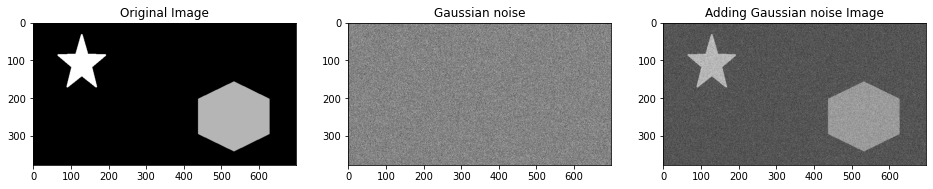

In [155]:


# Create a figure with three subplots arranged horizontally
fig, arr = plt.subplots(1, 3, figsize=(16,12))

# Display the original image in the first subplot
arr[0].imshow(original_image, cmap=plt.cm.gray)
arr[0].set_title('Original Image')

# Display the Gaussian noise in the second subplot
arr[1].imshow(noise, cmap=plt.cm.gray)
arr[1].set_title('Gaussian noise')

# Display the noisy image in the third subplot
arr[2].imshow(noisy_image, cmap=plt.cm.gray)
arr[2].set_title('Adding Gaussian noise Image')

# Show the figure
plt.show()


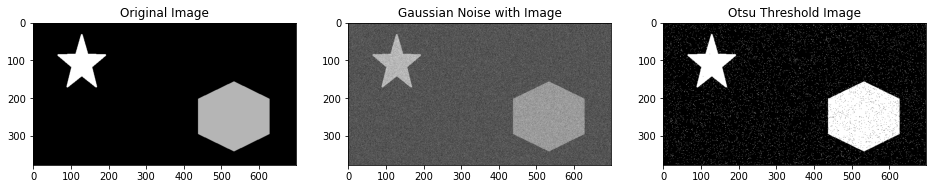

In [158]:
# Create a figure with three subplots arranged horizontally
fig, arr = plt.subplots(1, 3, figsize=(16, 12))

# Display the original image in the first subplot
arr[0].imshow(original_image, cmap=plt.cm.gray)
arr[0].set_title('Original Image')

# Display the noisy image with added Gaussian noise in the second subplot
arr[1].imshow(noisy_image, cmap=plt.cm.gray)
arr[1].set_title('Gaussian Noise with Image')

# Display the Otsu thresholded image in the third subplot
arr[2].imshow(thresholded_image, cmap=plt.cm.gray)
arr[2].set_title('Otsu Threshold Image')

# Show the figure
plt.show()


# Q2

2. Implement a region-growing technique for image segmentation. The basic idea is to start 
from a set of points inside the object of interest (foreground), denoted as seeds, and 
recursively add neighboring pixels as long as they are in a pre-defined range of the pixel 
values of the seeds.

In [177]:
# Import necessary libraries
import cv2
import urllib.request
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io, color
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

def region_growing(image, seed_points, threshold):
    # Convert the input image to grayscale
    grayscale_image = color.rgb2gray(image)
    # Initialize the segmented image as an array of zeros with the same shape as the grayscale image
    segmented_image = np.zeros_like(grayscale_image)
    # Set the seed points to 1 in the segmented image
    for seed_point in seed_points:
        segmented_image[seed_point[0], seed_point[1]] = 1
    # Define the neighborhood as 4-connected
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    # Loop over the seed points and grow the region
    while len(seed_points) > 0:
        # Get the next seed point
        current_point = seed_points.pop(0)
        # Loop over the neighbors of the current point
        for neighbor in neighbors:
            # Calculate the coordinates of the neighbor
            neighbor_coords = (current_point[0] + neighbor[0], current_point[1] + neighbor[1])
            # Check if the neighbor is within the image boundaries
            if (neighbor_coords[0] < 0 or neighbor_coords[0] >= grayscale_image.shape[0] or
                neighbor_coords[1] < 0 or neighbor_coords[1] >= grayscale_image.shape[1]):
                continue
            # Check if the neighbor is already segmented
            if segmented_image[neighbor_coords[0], neighbor_coords[1]] != 0:
                continue
            # Check if the neighbor is within the threshold
            if (grayscale_image[neighbor_coords[0], neighbor_coords[1]] >= (grayscale_image[current_point[0], current_point[1]] - threshold) and 
                grayscale_image[neighbor_coords[0], neighbor_coords[1]] <= (grayscale_image[current_point[0], current_point[1]] + threshold)):
                # Add the neighbor to the segmented image
                segmented_image[neighbor_coords[0], neighbor_coords[1]] = 1
                # Add the neighbor to the seed point list
                seed_points.append(neighbor_coords)
    # Return the segmented image
    return segmented_image


In [258]:

# Specify the URL of the image to download
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOB-OEq4WXXUIXcchQlfR5asjT7CaFr06j5MPoY4hR081lO-VulovWFsTgRlVOCw4VPvU&usqp=CAU' 

# Open the URL and read the image data into a byte array
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

# Decode the byte array to an image using OpenCV
img = cv2.imdecode(arr, -1)


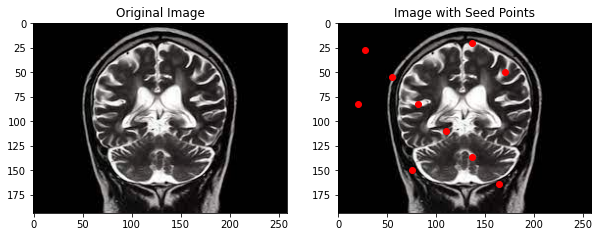

In [282]:
# Define the seed points as a list of (row, column) coordinates
seed_points = [(27, 27), (55, 55), (82, 82), (110, 110), (137, 137),(75,150), (170,50),(164, 164), (20, 82), (137, 20)]

# Create a figure and axis object with two subplots
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Display the original image in the first subplot
ax1[0].imshow(img)
ax1[0].set_title('Original Image')

# Display the input image and seed points in the second subplot
ax1[1].imshow(img)
for seed_point in seed_points:
    ax1[1].plot(seed_point[0], seed_point[1], 'ro')
ax1[1].set_title('Image with Seed Points')

# Save the image with seed points to a variable
seedImage = ax1[1].imshow(img)

# Show the plot
plt.show()


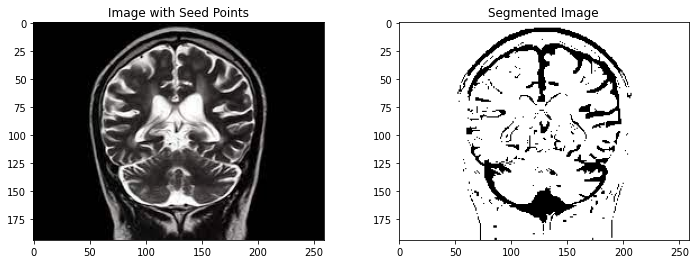

In [283]:

# Define the threshold value for region growing
threshold_value = 0.1

# Segment the image using the region-growing technique
segmented_image = region_growing(img, seed_points, threshold_value)

# Display the original and segmented images side by side
fig, ax2 = plt.subplots(1, 2, figsize=(12, 4))

# Display the input image and seed points in the second subplot
ax2[0].imshow(img)
for seed_point in seed_points:
    ax2[0].plot(seed_point[0], seed_point[1], 'ro')
ax2[0].set_title('Image with Seed Points')

ax2[1].imshow(segmented_image, cmap='gray')
ax2[1].set_title('Segmented Image')

plt.show()

